In [1]:
from google.colab import drive,files
import pandas as pd
import numpy as np
import seaborn as sns
import json

drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
# Importando os dados do meu google drive
url = '/content/drive/My Drive/Codenation/3 Semana/coestatistica-1/desafio1.csv'
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


In [4]:
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [5]:
df.describe()

,RowNumber,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,2020.870275,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1750.750000,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,3500.500000,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,5250.250000,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,7000.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


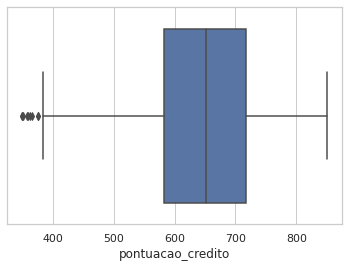

In [6]:
#Procurando saber da distribuição de pontuacao da base
sns.set(style="whitegrid")
sns.boxplot(x='pontuacao_credito', data = df)

In [7]:
#Encontrando todos os estados do datasheet
estados = list(df['estado_residencia'].unique())

###Informação

Na busca acima pelos os estados de residencia e em baixo pela media, mediana, moda e desvio padrao, todos foram feitos para ser aplicado em uma base de dados maior, eu poderia ter feito utilizando groupyby, mas preferi fazer deste modo pensando na reutilização do codigo fonte. 

In [8]:
def dados(dado):
  estado = df.query(f"estado_residencia == '{dado}'")['pontuacao_credito']
  return estado

def media(dado):
  media = dado.mean()
  return media

def mediana(dado):
  mediana = dado.median()
  return mediana

def moda(dado):
  moda = dado.agg(pd.Series.mode)
  print(moda)
  return  moda[0]

def desvio(dado):
  desvio = dado.std()
  return desvio

In [9]:
score = {}
for coluna in estados:
  dataframe = dados(coluna)
  dic = {'media': media(dataframe), 'mediana': mediana(dataframe), 'moda':moda(dataframe), 'desvio_padrao': desvio(dataframe)}
  score.update({coluna:dic})

0    850
dtype: int64
0    850
dtype: int64
0    850
dtype: int64


In [10]:
pd.DataFrame(score)

,SC,RS,PR
media,649.537653,651.105143,648.961294
mediana,653.000000,650.000000,650.000000
moda,850.000000,850.000000,850.000000
desvio_padrao,97.233493,95.136598,98.607186


In [11]:
pd.DataFrame(score).to_json('submission.json', orient='columns')

In [12]:
files.download('submission.json')

MessageError: ignored